# DBSCAN classifier

In this notebook we present a second example of unsupervised clustering algorithms. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.
Here I present Density-based spatial clustering of applications with noise (DBSCAN) available in the sklearn library. DBSCAN groups together points that are close to each other based on a distance measurementand a minimum number of points.
With respect to k-means, clusters found by DBSCAN can be any shape, and not only convex shaped as assumed by k-means

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

I prefer to define all the fit properties at the beginning


In [2]:
plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 11
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 11
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=True #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=25 #
plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks


plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']=22
plt.rcParams['figure.titlesize']=22

plt.rcParams['text.latex.preamble']=[r'\boldmath']

In [3]:
# First, using sklearn we will generate 2-d dataset with 3 clusters.
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=600, centers=3,cluster_std=0.80, random_state=0)
# X is the generated sample
print(X[0:10])
#Y is the cluster number, here 0,1, or 2 (label)
print (Y[0:10])

[[-0.05801545  4.51742802]
 [ 1.50937654  3.9352115 ]
 [ 0.86996562  4.06555462]
 [ 2.65958408  1.59158959]
 [ 1.95118196  0.97282624]
 [ 0.69307495  3.20382629]
 [-1.04937883  2.12805291]
 [-0.25904759  3.43625649]
 [ 2.69571936  0.9602718 ]
 [-1.5866384   3.12485541]]
[0 0 0 1 1 0 2 2 1 2]


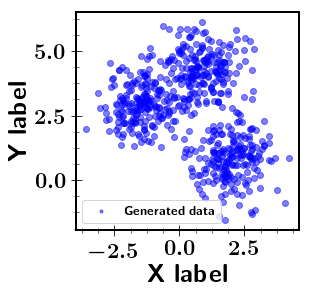

In [4]:
# Let's visualise the generated data
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w', edgecolor='k')
ax1.plot(X[:,0],X[:,1],'bo',alpha=0.5,label=r'\textbf{Generated data}')
ax1.set_xlabel(r'\textbf{X label}')
ax1.set_ylabel(r'\textbf{Y label}')
ax1.legend(loc=3,markerscale=0.5,prop={'size':13},ncol=1)


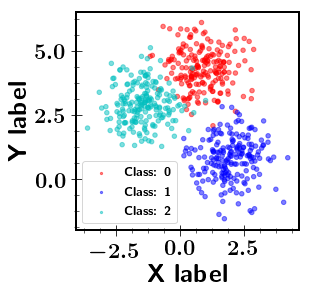

In [5]:

# In this case, a scatter plot is more appropriated
fig,ax1 = plt.subplots(figsize=(4,4), facecolor='w', edgecolor='k')
#Color bar
s = [20 for n in range(len(Y))]
#create a scatter plot
colors=['r','b','c']
class_Y=np.unique(Y)
for i in class_Y:
    ax1.scatter(X[:,0][Y==i],X[:,1][Y==i],s=s,alpha=0.5,color=colors[i],label=r'\textbf{Class: %s}'%class_Y[i])
ax1.set_xlabel(r'\textbf{X label}')
ax1.set_ylabel(r'\textbf{Y label}')
ax1.legend(loc=3,markerscale=0.5,prop={'size':13},ncol=1)


There are two parameters in DBSCAN:


$\textbf{*eps}$: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors. It is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value.

$\textbf{*minPoints}$: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region. Also this parameter controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desiable to increase this parameter)


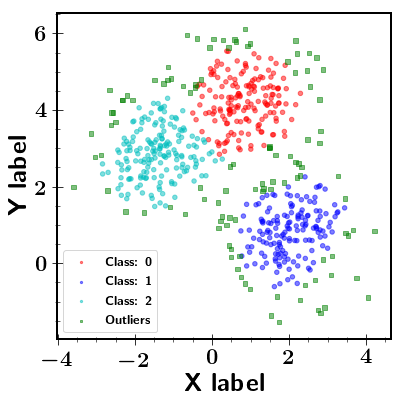

In [6]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.55, metric='euclidean', min_samples=24)
clustering.fit(X)
label_dbscan=clustering.labels_
fig,ax1 = plt.subplots(figsize=(6,6), facecolor='w', edgecolor='k')
#Color bar
s = [20 for n in range(len(label_dbscan))]
#create a scatter plot
colors=['r','b','c','g']
class_dbscan=np.unique(label_dbscan)

for i in class_Y:
    ax1.scatter(X[:,0][label_dbscan==i],X[:,1][label_dbscan==i],s=s,alpha=0.5,color=colors[i],label=r'\textbf{Class: %s}'%class_Y[i])
ax1.scatter(X[:,0][label_dbscan==-1],X[:,1][label_dbscan==-1],s=s,alpha=0.5,color='g',marker='s',label=r'\textbf{Outliers}')
ax1.set_xlabel(r'\textbf{X label}')
ax1.set_ylabel(r'\textbf{Y label}')
ax1.legend(loc=3,markerscale=0.5,prop={'size':13},ncol=1)

In [7]:
from sklearn.metrics import *
from sklearn import metrics
n_clusters_ = len(set(label_dbscan)) - (1 if -1 in label_dbscan else 0)
n_noise= list(label_dbscan).count(-1)
score = accuracy_score(Y,label_dbscan)
print('Accuracy:{:.2f} %'.format(score*100))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d, i.e. %d %%' % (n_noise,n_noise/np.size(Y)*100))
print('########')
print('Homogeneity: score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling')
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Y, label_dbscan))
print('########')
print('Completness: score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling')
print("Completeness: %0.3f" % metrics.completeness_score(Y, label_dbscan))
print('########')
print('V-measure: score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling')
print("V-measure: %0.3f" % metrics.v_measure_score(Y, label_dbscan))
print('########')
print('ARI:  Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.')
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(Y, label_dbscan))
print('########')
print('AMI: The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched). Random partitions (independent labellings) have an expected AMI around 0 on average hence can be negative')
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(Y, label_dbscan,average_method='arithmetic'))
print('########')
print('Silhouette Coefficient: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.')
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, label_dbscan))

Accuracy:80.67 %
Estimated number of clusters: 3
Estimated number of noise points: 109, i.e. 18 %
########
Homogeneity: score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling
Homogeneity: 0.772
########
Completness: score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling
Completeness: 0.618
########
V-measure: score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling
V-measure: 0.687
########
ARI:  Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.
Adjusted Rand Index: 0.683
########
AMI: The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched). Random partitions (independent labellings) have an expected AMI around 0 on average hence can be negative
Adjusted Mutual Information: 0.686
########
Silhouette Coefficient: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
Silhouette Coefficient: 0.397
